In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail/Online Retail.xlsx


# I. Introduction

This project is conduct the analyse the sales performance of of the UK-base online retail business. The goal of analyzing sales performance is to gain insights into how well a business's products or services are performing in terms of generating revenue. This analysis aims to understand trends, patterns, and factors that influence sales over a specific period. By examining sales performance, businesses can identify strengths, weaknesses, opportunities, and potential areas for improvement within their sales strategies and operations.

To begin with, we use the dataset dataset with the records of transactions that took place from December 1, 2010, to December 9, 2011, for a UK-based online retail business that operates without physical stores and is officially registered. The company specializes in selling distinctive gifts suitable for various occasions. A notable portion of the company's clientele consists of wholesale buyers.

**Libraries**

We run ***python*** script to analyze the data and we use the following python libraries during the whole analysis process:
* Pandas
* Numpy
* Mathplotlib/Seaborn


In [19]:
#to begin with the analysis process, the important libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# II. Data Overview

This dataset comprises transactional records capturing all the purchases made from 01/12/2010 to 09/12/2011 by a UK-based online retail business that operates without physical stores and is registered as such.

**Data Source**: The dataset used in this analysis project is retreive from the dataset of one retail store that represent the online sales of the store. The dataset can be found and downloaded [HERE](https://archive.ics.uci.edu/dataset/352/online+retail)

Overall, there are total of **541909** records in this dataset and it consists of 8 columns with details as following:

1. ***Invoice Number***: The identifier assigned to each transaction's invoice
2. ***Product Code***: A distinctive code assigned to each product that was sold
3. ***Product Description***: A brief explanation of the product that was sold
4. ***Quantity***: The number of units of a product sold in a given transaction
5. ***Transaction Date***: The date and time when the transaction took place
6. ***Price per Unit***: The cost of an individual product that was sold
7. ***Customer Identifier***: A unique label assigned to each customer
8. ***Location***: The country where the transaction was conducted

In [20]:
df = pd.read_excel("/kaggle/input/online-retail/Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# III. Data Analysis

We want to convert the datatype of the column 'InvoiceDate' in order to use it for further process in this analysis.

In [23]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

To start, our objective is to determine the income generated through sales. To achieve this, we utilize the 'Quantity' and 'UnitPrice' columns to calculate the revenue earned.

In [24]:
# Calculate revenue (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Revenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 541909, dtype: float64

It appears that the ***Total Revenue*** the store has earned over this period of time stated in the dataset is **9,747,747.93400317**

In [25]:
#Calculate Total Revenue

print(sum(df['Revenue']))

9747747.93400317


### Popular Products inside the Store

From the provided dataset, we can also identify the products that enjoy the highest demand or popularity among customers, as indicated by their frequency of purchase. Among all the products in the stores, the top 5 most popular products are:

1. WHITE HANGING HEART T-LIGHT HOLDER  
2. REGENCY CAKESTAND 3 TIER
3. JUMBO BAG RED RETROSPOT
4. PARTY BUNTING
5. LUNCH BAG RED RETROSPOT

In [41]:
# Sales analysis
#Finding the Popular Products inside the Store
popular_products = df['Description'].value_counts().head(10)
popular_products

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

### Best Selling Products Based on Quantity

Upon examining the dataset, it becomes apparent that the top-selling product, characterized by the greatest quantity, is *"WORLD WAR 2 GLIDERS ASSTD DESIGNS"* with a total potential sale of **53,847 units.**

In [42]:
#Sales Analysis
#Finding the Top Selling Products inside the Store based on Quantity

top_selling_products = df.groupby('Description')['Quantity', 'Revenue'].sum().nlargest(10, 'Quantity')
top_selling_products

/tmp/ipykernel_32/1142971696.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_selling_products = df.groupby('Description')['Quantity', 'Revenue'].sum().nlargest(10, 'Quantity')


,Quantity,Revenue
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
JUMBO BAG RED RETROSPOT,47363,92356.03
ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
POPCORN HOLDER,36334,33969.46
PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72
WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
RABBIT NIGHT LIGHT,30680,66756.59
MINI PAINT SET VINTAGE,26437,16810.42
PACK OF 12 LONDON TISSUES,26315,7972.76


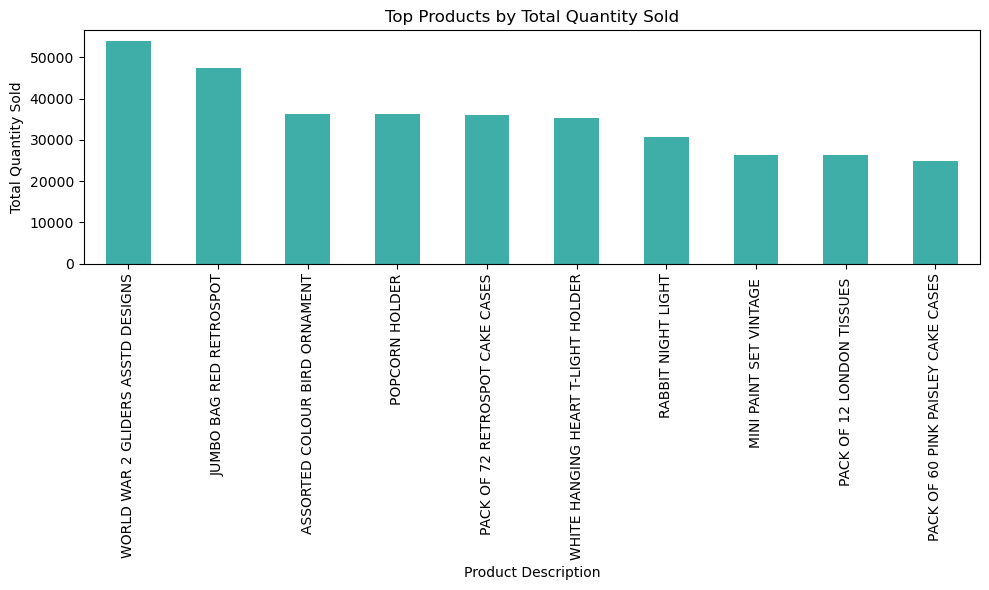

In [44]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Calculate total quantity sold for each product
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Plot top products by sales
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar', color = '#3fada8')
plt.title('Top Products by Total Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Best Selling Products Based on Revenue

Upon analyzing the dataset, it becomes evident that the product generating the highest revenue is "*DOTCOM POSTAGE*," contributing to a potential total revenue of **206,245.48.**

In [46]:
#Sales Analysis
#Finding the Top Selling Products inside the Store based on Revenue

top_selling_products = df.groupby('Description')['Quantity', 'Revenue'].sum().nlargest(10, 'Revenue')
top_selling_products


/tmp/ipykernel_32/905258600.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_selling_products = df.groupby('Description')['Quantity', 'Revenue'].sum().nlargest(10, 'Revenue')


,Quantity,Revenue
Description,,
DOTCOM POSTAGE,707,206245.48
REGENCY CAKESTAND 3 TIER,13033,164762.19
WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
PARTY BUNTING,18022,98302.98
JUMBO BAG RED RETROSPOT,47363,92356.03
RABBIT NIGHT LIGHT,30680,66756.59
POSTAGE,3003,66230.64
PAPER CHAIN KIT 50'S CHRISTMAS,18902,63791.94
ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73


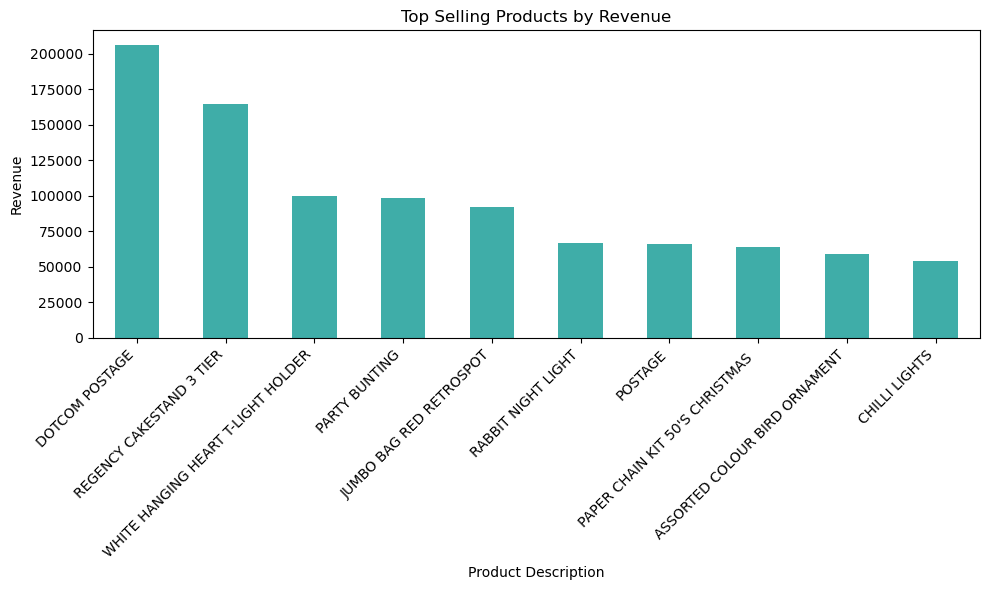

In [49]:
#Plot bar graph of Top Selling Product by Revenue

plt.figure(figsize=(10, 6))
top_selling_products['Revenue'].plot(kind='bar', color='#3fada8')
plt.title('Top Selling Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Quantity of Purchase and the Purchasing Revenue from Each Customer

In [28]:
# Customer analysis
unique_customers = df['CustomerID'].nunique()
customer_purchase = df.groupby('CustomerID')['Quantity', 'Revenue'].sum()
print(unique_customers)
print(customer_purchase)

4372
            Quantity  Revenue
CustomerID                   
12346.0            0     0.00
12347.0         2458  4310.00
12348.0         2341  1797.24
12349.0          631  1757.55
12350.0          197   334.40
...              ...      ...
18280.0           45   180.60
18281.0           54    80.82
18282.0           98   176.60
18283.0         1397  2094.88
18287.0         1586  1837.28

[4372 rows x 2 columns]


/tmp/ipykernel_32/2698683552.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_purchase = df.groupby('CustomerID')['Quantity', 'Revenue'].sum()


### Daily Sales Transaction of the Store

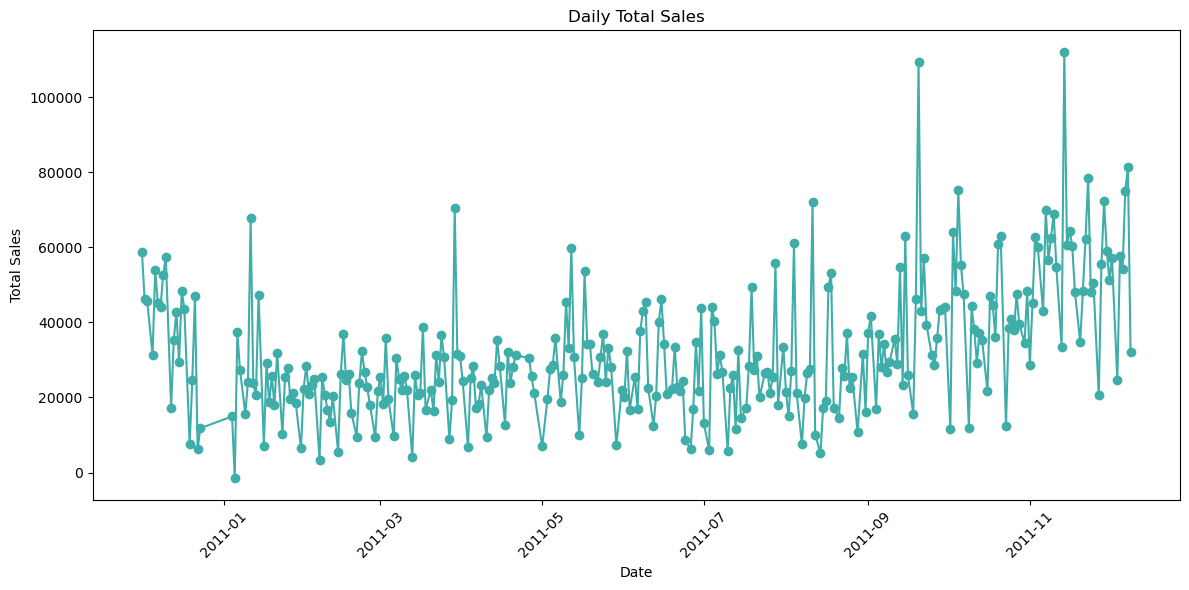

In [29]:
# Calculate Daily Sales

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()


plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color = '#3fada8')
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Number of Sales by Month

By studying the aggregate sales for each month, it becomes apparent that overall, the sales decreased drastically compraed to January after hiting the peak in November.

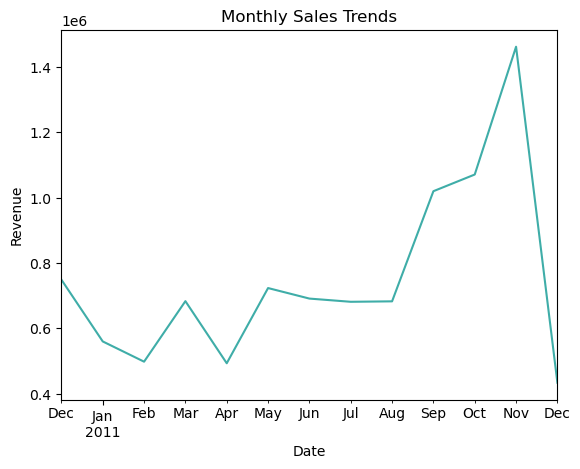

In [30]:
# Calculate Total Sales by Month

monthly_sales = df.resample('M', on='InvoiceDate')['Revenue'].sum()
monthly_sales.plot(kind='line', color = '#3fada8')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

### Total Sales by Country

The United Kingdom emerges as the leading revenue contributor among all countries in this dataset. This finding underscores the fact that the highest portion of the total revenue is attributed to transactions originating from the United Kingdom.



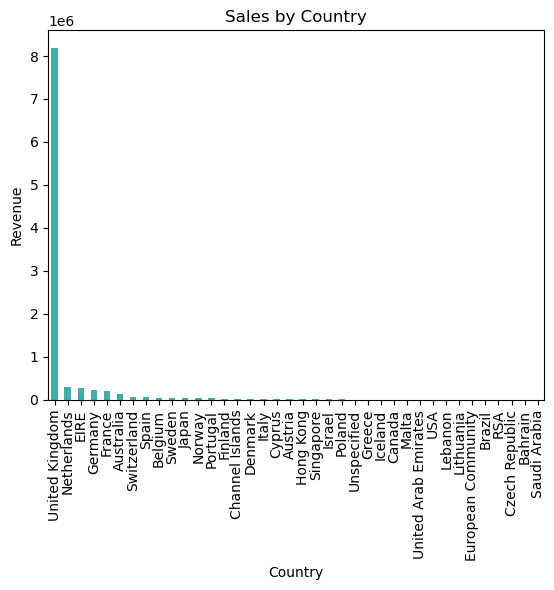

In [31]:
# Calculate Total Sales by Country
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', color = '#3fada8')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

### The Relationship of Total Transactions and Total Purchases of Customers of the Store

The concentration of points around the lower range of total transactions (0 to 25) indicates that a significant number of customers have engaged in a relatively small number of transactions. This suggests that a substantial portion of customers might be occasional buyers or may not have made frequent purchases.

On the other hand, the majority of points align within the lower range of total quantity purchased (0 to 25,000). This indicates that most customers, regardless of their transaction frequency, tend to purchase relatively moderate quantities of products.

The combination of these two trends suggests that while there are many customers who have engaged in few transactions and purchased small quantities, there are also customers who, despite having a similar transaction frequency, have purchased larger quantities. This might imply that certain customers are bulk buyers, acquiring more items in each transaction, even if they transact less frequently.

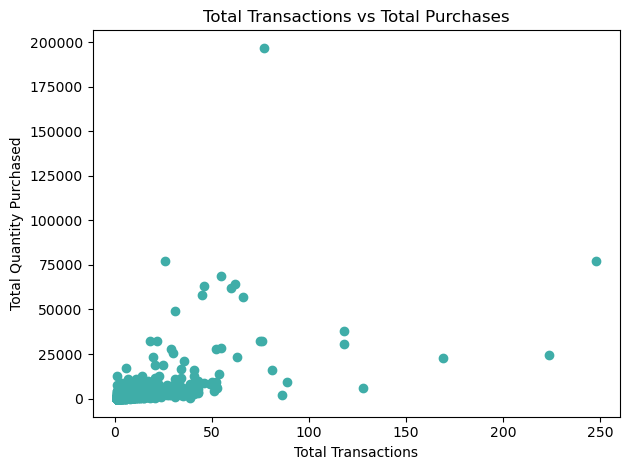

In [33]:
# Calculate total purchases and number of transactions for each customer
customer_data = df.groupby('CustomerID').agg({'Quantity': 'sum', 'InvoiceNo': 'nunique'}).reset_index()
customer_data.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)

# Scatter plot of total transactions vs. total purchases
plt.scatter(customer_data['TotalTransactions'], customer_data['Quantity'], color='#3fada8')
plt.title('Total Transactions vs Total Purchases')
plt.xlabel('Total Transactions')
plt.ylabel('Total Quantity Purchased')
plt.tight_layout()
plt.show()


### The Distribution of Order Values


The high frequency of order values within the range of 0 to 50,000 suggests that a significant portion of transactions are associated with relatively lower order values. This indicates that a substantial number of customers are making smaller purchases. These transactions could involve lower-cost products or fewer quantities.

The low frequency of order values between -50,000 to 0 is intriguing. Negative order values typically indicate that refunds or returns have occurred, resulting in a deduction from the overall revenue. The presence of such negative order values suggests that there are instances of refunds or returns happening, albeit less frequently compared to regular transactions. Analyzing this aspect can help identify potential issues with products, customer satisfaction, or operational processes.

The distribution is right-skewed, with a tail that extends to higher order values. This suggests that while there are many smaller transactions, there are also transactions with higher order values. These transactions could involve bulk purchases, higher-priced items, or potentially sales of larger quantities.

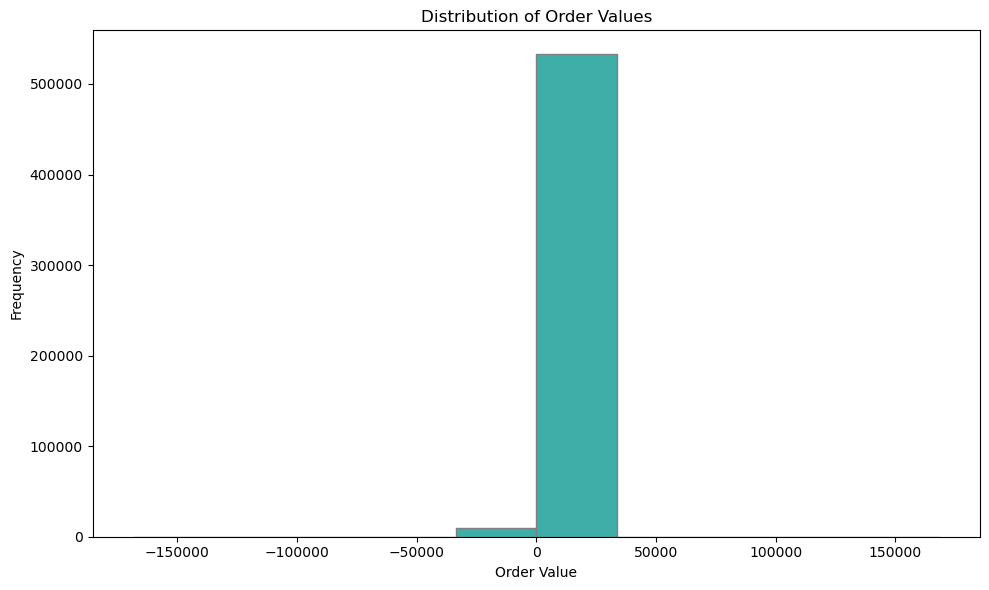

In [53]:
# Calculate the order value for each transaction
df['OrderValue'] = df['Quantity'] * df['UnitPrice']

# Plot the distribution of order values
plt.figure(figsize=(10, 6))
plt.hist(df['OrderValue'], bins=10, color = '#3fada8', edgecolor='gray')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Distribution of Unique Products Purchased by Customers

In this dataset, the majority of customers have purchased a relatively small number of unique products. The peak on the left side of the distribution indicates that a substantial portion of customers have made only a few distinct purchases from the company's product range. This could be due to various factors, such as customers buying specific items that meet their needs or preferences, or customers making repeat purchases of their favorite products.

On the right side of the distribution, there is a tail that extends to higher numbers of unique products. This suggests that a smaller proportion of customers are more diversified in their purchases, exploring a wider variety of products offered by the store.

Overall, the right-skewed distribution indicates that while there are a few customers who explore a wide range of products, the majority of customers tend to focus on a smaller subset of items.

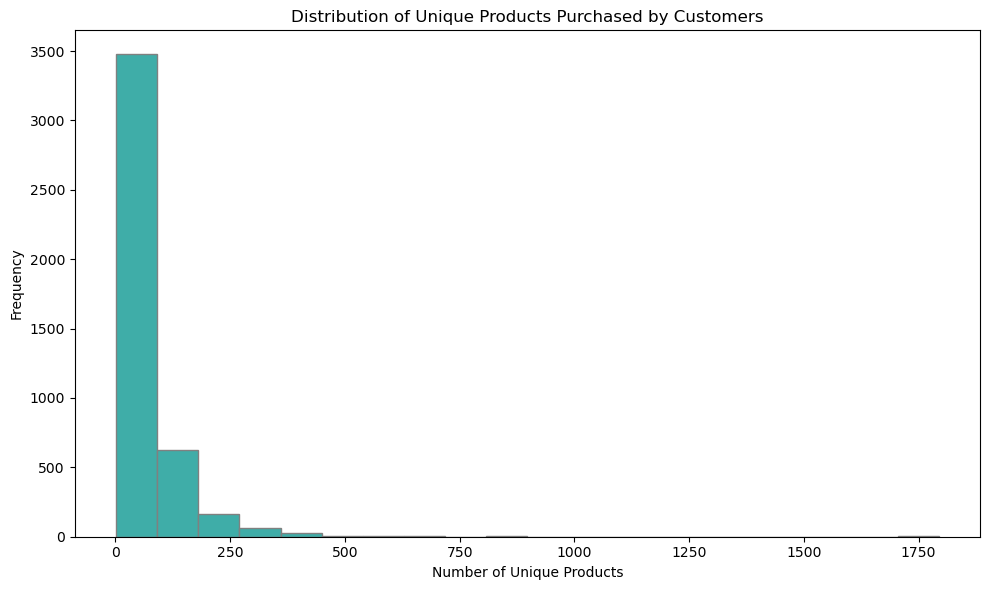

In [54]:
# Group data by CustomerID and calculate the count of unique products
customer_product_count = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
customer_product_count.rename(columns={'StockCode': 'UniqueProductCount'}, inplace=True)

# Plot the distribution of unique product counts
plt.figure(figsize=(10, 6))
plt.hist(customer_product_count['UniqueProductCount'], bins=20, color = '#3fada8', edgecolor='gray')
plt.title('Distribution of Unique Products Purchased by Customers')
plt.xlabel('Number of Unique Products')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### The Number of Single Purchase Customers

From the dataset analysis, we could see that among all unique customers (3,959), there are the total number of the customers who made a single purchase is 1,313. This indicates that there are the total of 1,313 cusotmers who made the first purchase at the store and did not return back to buy products at the store.

In [36]:
# Group data by CustomerID and calculate the count of unique invoices
customer_invoice_count = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_invoice_count.rename(columns={'InvoiceNo': 'UniqueInvoiceCount'}, inplace=True)

# Filter customers with only a single purchase
single_purchase_customers = customer_invoice_count[customer_invoice_count['UniqueInvoiceCount'] == 1]

print(single_purchase_customers)

      CustomerID  UniqueInvoiceCount
3        12349.0                   1
4        12350.0                   1
6        12353.0                   1
7        12354.0                   1
8        12355.0                   1
...          ...                 ...
4350     18256.0                   1
4355     18262.0                   1
4366     18278.0                   1
4367     18280.0                   1
4368     18281.0                   1

[1313 rows x 2 columns]


In [37]:
total_single_purchase_customers = len(single_purchase_customers)
print("Total single-purchase customers:", total_single_purchase_customers)

Total single-purchase customers: 1313


# IV. Conclusions and Suggestions

### Conclusions

1. **Popular Products:** The analysis revealed the top 5 most popular products, indicating the items that enjoy the highest frequency of purchase among customers. This insight can help the store understand which products are in high demand and adjust their inventory or marketing strategies accordingly.

2. **Best Selling Products:** By examining both the highest quantity and revenue generating products, the store can prioritize these items, consider expanding their offerings in these categories, and potentially promote them to boost sales.

3. **Monthly Sales Trends:** Analyzing the total sales by month helps the store recognize seasonal patterns. The drastic decrease in sales after November suggests that the holiday season significantly impacts sales, and strategies could be devised to maintain customer engagement throughout the year.

4. **Country-wise Revenue:** Identifying the United Kingdom as the top revenue contributor is crucial for the store's marketing and expansion strategies. It can consider focusing on retaining and growing its customer base in the United Kingdom while exploring opportunities in other countries.

5. **Customer Transaction and Purchase Behavior:** Understanding the relationship between total transactions and total purchases reveals distinct patterns among customers. Some make frequent transactions with smaller quantities, while others may be bulk buyers. These insights can guide customer segmentation and personalized marketing approaches.

6. **Order Value Distribution:** The distribution of order values provides valuable information about customer spending behavior. The presence of negative order values highlights the need for monitoring and improving customer satisfaction and operational processes related to returns and refunds.

7. **Customer Product Diversity:** The distribution of unique products purchased by customers indicates that while many customers make selective purchases, a smaller portion explores a broader range of products. The store can tailor recommendations and marketing messages based on individual preferences and encourage exploration of new products.

8. **Single Purchase Customers:** Identifying the number of single purchase customers helps the store recognize its customer retention efforts. The significant number of one-time buyers (1,313) suggests a potential opportunity to implement strategies to convert more single purchases into repeat business.

### Suggestions:

1. **Promotion and Marketing:** The store can leverage the popularity of top-selling and most purchased products in its promotions and marketing campaigns to attract more customers.

2. **Seasonal Strategies:** The store should devise strategies to maintain sales momentum beyond the holiday season, potentially by introducing new product launches or offering exclusive deals to keep customers engaged.

3. **Customer Segmentation:** Tailoring marketing approaches based on the transaction and purchase behavior can enhance customer relationships. Engaging bulk buyers with special offers or providing personalized recommendations to selective purchasers can drive customer loyalty.

4. **International Expansion:** While the United Kingdom is a strong revenue contributor, the store can explore expansion into other countries where there is demand for its products.

5. **Customer Retention:** Focus on converting single-purchase customers into repeat buyers by offering loyalty programs, exclusive offers, and personalized recommendations.

6. **Returns and Refunds:** Analyze the reasons behind negative order values and work on minimizing returns and refunds by ensuring product quality, accurate descriptions, and efficient customer service.

7. **Diversification Strategy:** Encourage customers to explore a broader range of products by showcasing complementary items, offering package deals, or suggesting items based on their past purchases.

8. **Customer Experience Enhancement:** Improving the overall customer experience, from website navigation to checkout and post-purchase support, can contribute to customer satisfaction and retention.